In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

### TRAIN
        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [2]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [3]:
test_input = pd.read_csv('/home/dissertation/data/sample_submission_v2.csv', 
                          dtype = {'msno' : 'category'})
test_input.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [4]:
train_input.is_churn.value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [5]:
np.mean(train_input.is_churn)

0.08994191315811156

In [6]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null category
is_churn    970960 non-null int64
dtypes: category(1), int64(1)
memory usage: 58.5 MB


 0    883630
1     87330
Name: is_churn, dtype: int64


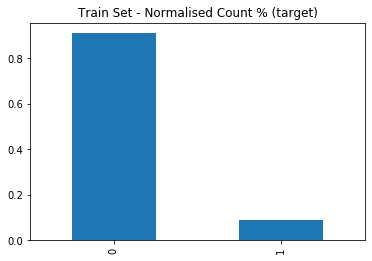

In [7]:
train_input.is_churn.value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalised Count % (target)')
print("",train_input.is_churn.value_counts())

In [8]:
train_input.describe(include='all')

,msno,is_churn
count,970960,970960.00
unique,970960,nan
top,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,nan
freq,1,nan
mean,NaN,0.09
std,NaN,0.29
min,NaN,0.00
25%,NaN,0.00
50%,NaN,0.00
75%,NaN,0.00


So we have churn records for 970960 members

### MEMBERS

In [9]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv',
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str,
                                   'city' : 'category',
                                   'registered_via' : 'category'})

In [10]:
members_input['registration_init_time_dt'] = pd.to_datetime(members_input['registration_init_time'], 
                                                            format='%Y%m%d', errors='ignore')

In [11]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15


In [12]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,6769473,6769473,6769473.00,2339968,6769473,6769473.00,6769473
unique,6769473,21,nan,2,18,nan,4782
top,X0IEpZMYh/C4pbkYuGbsRcnBpJfc4uLkURjoj/JLZVg=,1,nan,male,4,nan,2015-10-09 00:00:00
freq,1,4804326,nan,1195355,2793213,nan,12413
first,NaN,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,NaN,nan,NaN,NaN,nan,2017-04-29 00:00:00
mean,NaN,NaN,9.80,NaN,NaN,20145175.91,NaN
std,NaN,NaN,17.93,NaN,NaN,23186.01,NaN
min,NaN,NaN,-7168.00,NaN,NaN,20040326.00,NaN
25%,NaN,NaN,0.00,NaN,NaN,20140422.00,NaN


#### BD: Age of member

{'whiskers': [<matplotlib.lines.Line2D at 0x7fec7f0c1860>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec7f0c1a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fec7f0c1da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fec7d8a7be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fec7d8a7390>],
 'means': []}

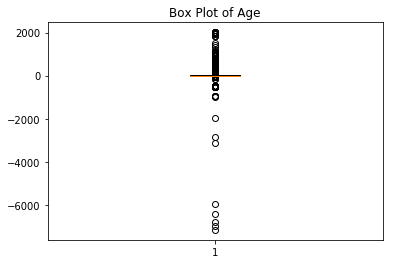

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input['bd'])

In [14]:
upper_q = .99
lower_q = .01
upper_price_outlier = members_input['bd'].quantile(upper_q)
lower_price_outlier = members_input['bd'].quantile(lower_q)
print("Using {0} and {1} quantiles would suggest {2} and {3} as the upper and lower bounds of bd".format(upper_q, lower_q, upper_price_outlier, max(0, lower_price_outlier)))
print("This method would  exclude {0} instances".format(len(members_input[~members_input.bd.between(lower_price_outlier, upper_price_outlier)])))
print("Very inconsistent/noisy data in this feature. Needs to be processed somehow")

Using 0.99 and 0.01 quantiles would suggest 54.0 and 0 as the upper and lower bounds of bd
This method would  exclude 62658 instances
Very inconsistent/noisy data in this feature. Needs to be processed somehow


#### Categorical Features

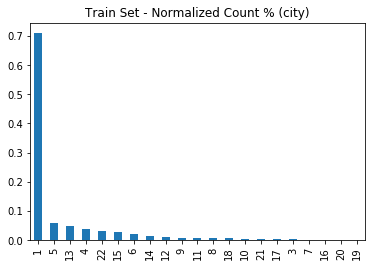

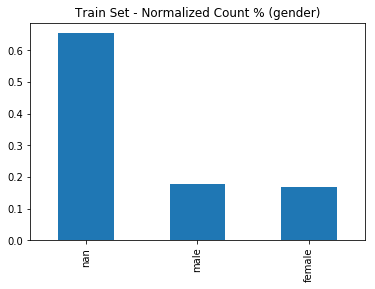

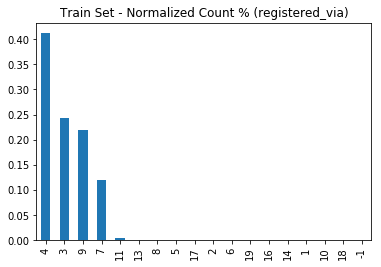

In [15]:
for idx, col in enumerate(['city','gender','registered_via']):
    plt.figure()
    members_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (~ 70%)
    A large portion (>60%) of gender information is missing
    There are 4 main popular approaches to registering, [4, 3, 9, 7]. The rest are minimal

#### TRANSACTIONS

In [16]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,True,20150930,20151101,False
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,True,20150930,20151031,False
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,True,20150930,20160427,False
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,True,20150930,20151128,False
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,True,20150930,20151121,False


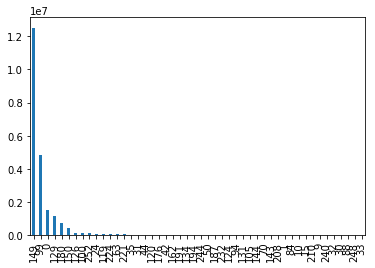

In [17]:
transactions_input.plan_list_price.value_counts().plot(kind='bar')

In [18]:
transactions_input.describe(include='all')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,21547746,21547746.00,21547746.00,21547746.00,21547746.00,21547746,21547746.00,21547746.00,21547746
unique,2363626,nan,nan,nan,nan,2,nan,nan,2
top,xm6fmAfgZx1OYUXaJuHOObD0H2EAtIktv9NYIVlaTf4=,nan,nan,nan,nan,True,nan,nan,False
freq,71,nan,nan,nan,nan,18357950,nan,nan,20690895
mean,NaN,38.93,30.15,127.05,128.65,NaN,20157597.16,20158624.78,NaN
std,NaN,3.51,18.30,42.32,39.57,NaN,6155.98,7755.75,NaN
min,NaN,1.00,0.00,0.00,0.00,NaN,20150101.00,19700101.00,NaN
25%,NaN,38.00,30.00,99.00,99.00,NaN,20150906.00,20151019.00,NaN
50%,NaN,41.00,30.00,149.00,149.00,NaN,20160321.00,20160430.00,NaN
75%,NaN,41.00,30.00,149.00,149.00,NaN,20160925.00,20161031.00,NaN


(array([1.1970e+06, 9.1000e+01, 5.0000e+01, 0.0000e+00, 4.4805e+04,
        6.0000e+00, 1.4370e+04, 0.0000e+00, 1.1274e+04, 1.0560e+03,
        0.0000e+00, 0.0000e+00, 1.2086e+04, 2.5000e+02, 0.0000e+00,
        0.0000e+00, 7.7000e+01, 3.0000e+00, 6.0600e+02, 4.9362e+06,
        3.7400e+02, 0.0000e+00, 0.0000e+00, 3.6003e+05, 5.9900e+02,
        1.2889e+06, 4.8070e+03, 0.0000e+00, 4.9400e+02, 1.2857e+07,
        0.0000e+00, 0.0000e+00, 5.1210e+03, 0.0000e+00, 5.5260e+03,
        6.8006e+05, 0.0000e+00, 5.2880e+03, 1.5010e+03, 0.0000e+00,
        0.0000e+00, 1.4800e+02, 0.0000e+00, 1.0847e+04, 2.3170e+04,
        0.0000e+00, 7.8300e+02, 1.3000e+01, 1.2110e+03, 8.3995e+04]),
 array([  0.  ,   5.04,  10.08,  15.12,  20.16,  25.2 ,  30.24,  35.28,
         40.32,  45.36,  50.4 ,  55.44,  60.48,  65.52,  70.56,  75.6 ,
         80.64,  85.68,  90.72,  95.76, 100.8 , 105.84, 110.88, 115.92,
        120.96, 126.  , 131.04, 136.08, 141.12, 146.16, 151.2 , 156.24,
        161.28, 166.32, 171.36

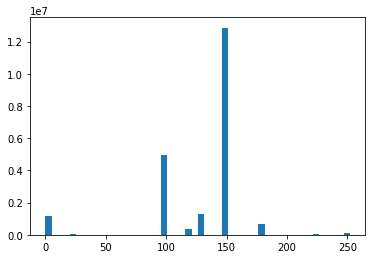

In [19]:
plt.hist(transactions_input.actual_amount_paid, bins=50)

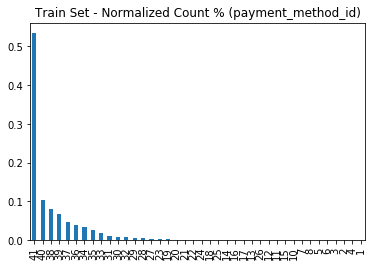

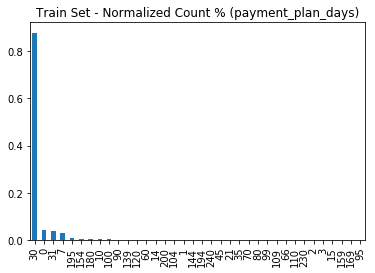

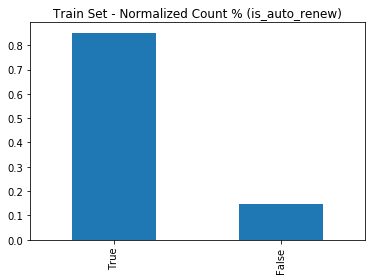

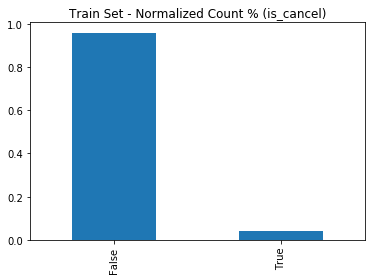

In [20]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    most transactions are for 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription

### Merging train_input and members

In [13]:
merged_input = pd.merge(left=train_input, right=members_input, how='inner', on=['msno'])
merged_input.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25


In [16]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,860967,860967.00,860967,860967.00,388905,860967,860967.00,860967
unique,860967,nan,21,nan,2,5,nan,4749
top,PQhwDkADyVnquZ8ASpgIEEvt4U8/J3j3xMc7WP3f13s=,nan,1,nan,male,7,nan,2015-10-09 00:00:00
freq,1,nan,442598,nan,204561,462684,nan,1575
first,NaN,nan,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,nan,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00
mean,NaN,0.09,NaN,13.58,NaN,NaN,20132648.96,NaN
std,NaN,0.29,NaN,20.06,NaN,NaN,30111.74,NaN
min,NaN,0.00,NaN,-3152.00,NaN,NaN,20040326.00,NaN
25%,NaN,0.00,NaN,0.00,NaN,NaN,20120214.00,NaN


is_churn,0,1
gender,,
female,0.19,0.03
male,0.21,0.03
nan,0.51,0.04


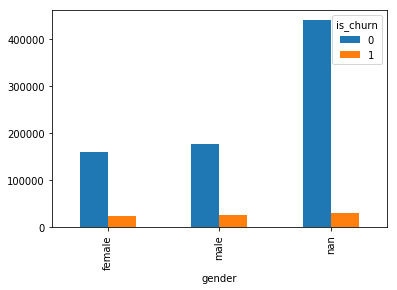

In [23]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7febf2684f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7febf268d668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7febf2684ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7febf268dcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7febf268dda0>],
 'means': []}

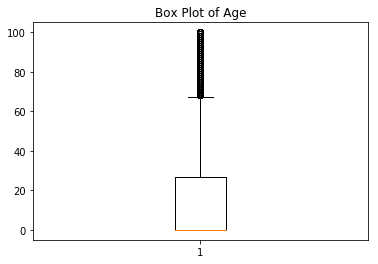

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(merged_input[merged_input.bd.between(0,100)]['bd'])

### Merging Transactions with those members involved in the churn study

In [26]:
transactions_merged = pd.merge(left = merged_input[['msno']], 
                               right = transactions_input, 
                               how='left', 
                               on='msno')
transactions_merged.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38.00,30.00,149.00,149.00,False,20170228.00,20170330.00,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150331.00,20150430.00,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150630.00,20150731.00,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,30.00,149.00,149.00,True,20150902.00,20150901.00,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150831.00,20150930.00,False


In [28]:
len(transactions_merged)

13644008

In [27]:
transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38.00,30.00,149.00,149.00,False,20170228.00,20170330.00,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150331.00,20150430.00,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150630.00,20150731.00,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,30.00,149.00,149.00,True,20150902.00,20150901.00,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150831.00,20150930.00,False
5,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150731.00,20150831.00,False


In [29]:
%%time
#[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
        .groupby('msno')\
        .agg({'msno' : {'total_order' : 'count'},
                        'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
                                               'payment_method_id_count' : lambda x: len(np.unique(x))},
                        'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
                                               'payment_plan_days_mean' : 'mean'},
                        'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                             'plan_lifetime_value' : 'sum'},
                        'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                'total_actual_amount' : 'sum'},
                        'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
                        'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                              'transaction_date_max' : lambda x: x.max()},
                        'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
            })

CPU times: user 683 ms, sys: 0 ns, total: 683 ms
Wall time: 716 ms


/home/anaconda/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


msno  \
                                             total_order   
msno                                                       
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=           6   

                                                  payment_method_id  \
                                             payment_method_id_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  31.00   

                                                                      \
                                             payment_method_id_count   
msno                                                                   
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                    2.00   

                                                  payment_plan_days  \
                                             payment_plan_days_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  30.00   

                                                                     \
                                             payment_plan_days_mean   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  10.00   

                                                  plan_list_price  \
                                             plan_list_price_mean   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                49.67   

                                                                  \
                                             plan_lifetime_value   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              298.00   

                                             actual_amount_paid  \
                                             actual_amount_mean   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             149.00   

                                                                  \
                                             total_actual_amount   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              894.00   

                                                  is_auto_renew  \
                                             is_auto_renew_mode   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=               True   

                                                 transaction_date  \
                                             transaction_date_min   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=          20150331.00   

                                                                     is_cancel  
                                             transaction_date_max cancel_times  
msno                                                                            
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=          20170228.00            1

In [30]:
transactions_summary = \
    transactions_merged\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

In [31]:
transactions_summary.head()

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4,41.00,1.00,30.00,30.00,99.00,396.00,99.00,396.00,True,20161116.00,20170215.00,0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,19,39.00,1.00,30.00,28.58,141.16,2682.00,149.00,2831.00,True,20150131.00,20170131.00,0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,26,41.00,1.00,30.00,28.85,143.27,3725.00,149.00,3874.00,True,20150126.00,20170226.00,0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,12,41.00,1.00,30.00,30.00,149.00,1788.00,149.00,1788.00,True,20160315.00,20170215.00,0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,19,39.00,1.00,30.00,28.58,141.16,2682.00,149.00,2831.00,True,20150131.00,20170131.00,0


In [32]:
len(transactions_summary)

860967

In [ ]:
transactions_summary.to_hdf('/home/dissertation/data/transactions_summary.h5', key='transactions_summary', mode='w')

In [34]:
base_abt = pd.merge(left = merged_input,
                    right = transactions_summary,
                    how = 'inner',
                    on='msno')

base_abt.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,...,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23,6,31.00,...,0.00,10.00,49.67,298.00,149.00,894.00,True,20150331.00,20170228.00,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23,5,38.00,...,30.00,25.40,125.40,627.00,125.40,627.00,False,20160303.00,20170210.00,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27,18,38.00,...,30.00,30.00,149.00,2682.00,149.00,2682.00,False,20150819.00,20170130.00,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,nan,7,20140109,2014-01-09,19,41.00,...,30.00,25.63,125.47,2384.00,141.16,2682.00,True,20150108.00,20160225.00,3
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25,24,41.00,...,30.00,26.25,105.38,2529.00,123.17,2956.00,True,20150124.00,20160901.00,2


In [35]:
base_abt.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,...,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
count,860967,860967.00,860967,860967.00,860967,860967,860967.00,860967,860967.00,858935.00,...,858935.00,858935.00,858935.00,860967.00,858935.00,860967.00,858935,858935.00,858935.00,860967.00
unique,860967,nan,21,nan,3,5,nan,4749,nan,nan,...,nan,nan,nan,nan,nan,nan,2,nan,nan,nan
top,Xab0MfqElDz36S2r93L8Ml4NoUxTuuyjFfHsDR5GAKU=,nan,1,nan,nan,7,nan,2015-10-09 00:00:00,nan,nan,...,nan,nan,nan,nan,nan,nan,True,nan,nan,nan
freq,1,nan,442598,nan,472062,462684,nan,1575,nan,nan,...,nan,nan,nan,nan,nan,nan,737269,nan,nan,nan
first,NaN,nan,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
last,NaN,nan,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
mean,NaN,0.09,NaN,13.58,NaN,NaN,20132648.96,NaN,15.85,38.80,...,32.08,32.17,129.33,2061.43,132.37,2137.34,NaN,20154702.11,20169855.53,0.28
std,NaN,0.29,NaN,20.06,NaN,NaN,30111.74,NaN,8.66,3.70,...,17.11,17.89,27.22,1233.57,28.15,1294.64,NaN,5999.33,1840.60,0.58
min,NaN,0.00,NaN,-3152.00,NaN,NaN,20040326.00,NaN,1.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,20150101.00,20150102.00,0.00
25%,NaN,0.00,NaN,0.00,NaN,NaN,20120214.00,NaN,8.00,38.00,...,30.00,28.85,99.00,990.00,99.00,990.00,NaN,20150127.00,20170205.00,0.00


In [42]:
## Merge the transactions summary info and the other crap and dump to HDF5 for later modelling

In [40]:
base_abt = base_abt[~base_abt.is_auto_renew_mode.isnull()]
base_abt['is_auto_renew_mode'] = base_abt['is_auto_renew_mode'].astype(bool) 

In [41]:
base_abt.to_hdf('/home/dissertation/data/base_abt.h5', key='base_abt', mode='w', format='table')